# Transfer Learning

* 🤯 Tech companies and university labs have more computational resources than we do
* 😎 Let them train their  super complex models on millions of images, and could re-use their kernels for our own CNNs !

🎯 **<u>Goal:</u>**
* ☄️ Use a **Pretrained Neural Network** $ \Leftrightarrow $ **Transfer learning**

## (1) What is a Pre-Trained Neural Network ?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images. 
* One could imagine that these patterns are not 100% specific to one task but to the input images. 

🚀 **Why not re-using these kernels - whose weights have already been optimized - somewhere else?** 
- The expectation is that the trained kernels could also help us perform another classification task.
- We are trying to ***transfer*** the knowledge of a trained CNN to a new classification task.


💪 Transfer Learning has two  main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only some of them
- You benefit from state-of-the-art architectures that have been trained on complex images. 

## (2) Introduction to  VGG16 

📚 ***Reading Section, no code***






In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories. 

👉 This architecture already learnt what kernels are supposed to be the best for extracting features from the images found in the `ImageNet dataset`.

👉 As you can see in the illustration, the VGG16 involves millions of parameters you don't want to retrain yourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layer is a "classification layers" that can be preceded with a couple of dense layers...  Therefore, we will: 
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them by some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task. 

😃 Your role is to train  only learn the last layers for your particular problem.

🤓 We will use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

## (3) Data loading & Preprocessing

You have two options to load the data on Google Colab.

### (Option 1) Loading the data directly

* You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

* and then run 

`!unzip flowers-dataset.zip`

*This is a very easy option to load the data into your working directory.*

### (Option 2) Adding the data to Google Drive

* You can first download the data  from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`. 
* Then you have to add them to your Google Drive in a folder called `Deep_learning_data` (for instance)
* And run the following code in the notebook: 

```python
from google.colab import drive
drive.mount('/content/drive/')
```

* The previous code will ask you to go to a given webpage where you can copy a temporary key
* Paste it in the cell that will appear in your Colab Notebook
* You can now load the data on your Google Colab Notebooks

### Option 1 or Option 2 ?

* Why choosing option 2 over the option 1? 
    * ✅ The combo Colab + Drive can be interesting if you work within a project team, and need to update the data from time to time. 
    * ✅ By doing this, you can share the same data folder with your teammates, and be sure that everyone has the same dataset at any time, even though someone changes it. 
    * ❌ Google Colab has now access to your Google Folder..., which you might not be or not in favor of, depending on your sensibility...

---

❓ **Question: Loading your dataset** ❓ 
    
Use one of the above method to load your data

In [ ]:
option_1 = True # Choose here

if option_1:
    !wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
    !unzip flowers-dataset.zip
else:
    from google.colab import drive
    drive.mount('/content/drive/')

In [2]:
!pwd

/content


In [3]:
!ls

flowers  flowers-dataset.zip  sample_data


❓ **Question:Train/Val/Test split** ❓ 

Use the following method to create 
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [4]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [5]:
# CALL load_flowers_data WITH YOUR PREFERRED METHOD HERE
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')

100%|██████████| 299/299 [00:01<00:00, 247.99it/s]


❓ **Question: Exploring the images** ❓

Check the images' shapes and plot few of them.

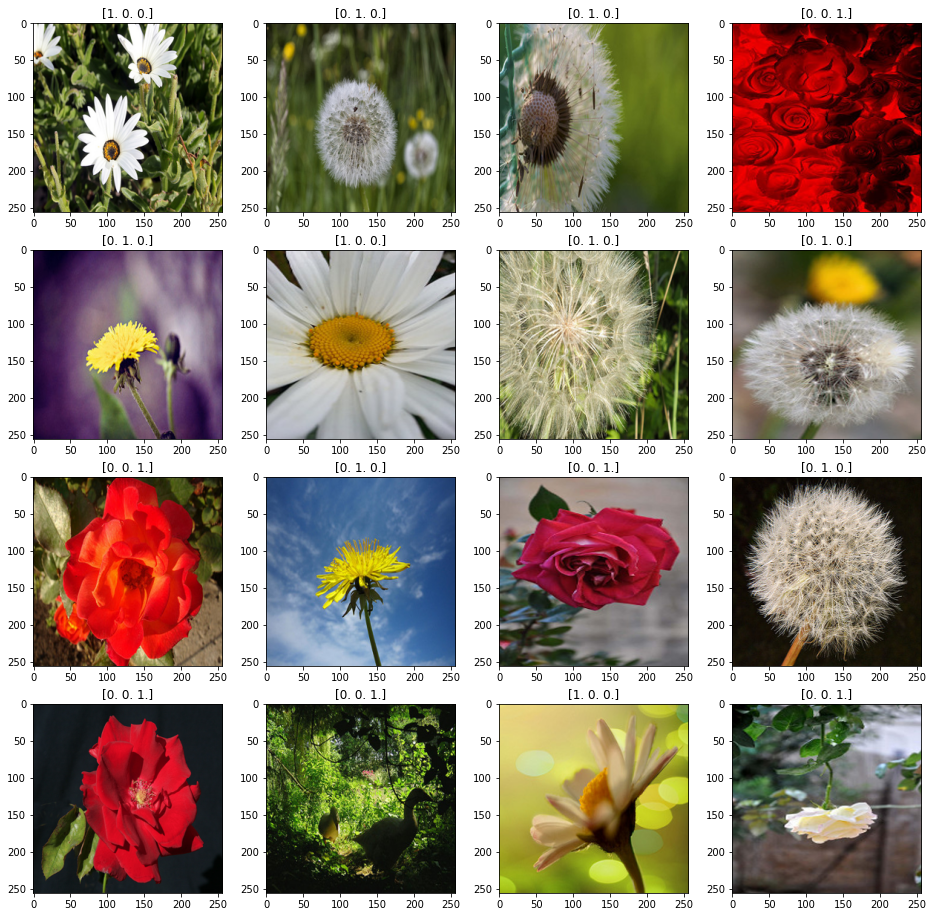

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize = (16, 16))

for img, label, ax in zip(X_train[:16], y_train[:16], axes.flat):
  ax.imshow(img)
  ax.set_title(f'{label}')

## (4) A CNN architecture

First, let's build our own CNN.

❓ **Questions** ❓ 

1. <u>CNN Architecture and compiler:</u> Create a CNN with your own architecture and a function `load_own_model` that will be able to generate it. Some advices:
    - Incorporate the Rescaling Layer in your Sequential architecture
    - Add three Conv2D/MaxPooling2D combinations with an increasing size of channels and a decreasing size of kernels for example (be creative, that is not a rule of thumb, mastering CNN is an art)
    - Don't forget the Flatten layer and some hidden layers
    - Finish with the predictive layer
    - Compile your CNN model accordingly
  
  
2. <u>Training and comparison</u>:
    - Train your CNN
    - Compare its performance to a baseline accuracy

<details>
    <summary><i>Recommended architecture:</i></summary>

```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```

        
</details>        

In [11]:
X_train.max()

255

In [9]:
X_train.shape

(571, 256, 256, 3)

In [16]:
y_train.shape

(571, 3)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

def load_own_model():

  model = Sequential()

  model.add(Rescaling(1/255, input_shape = (256, 256, 3)))

  model.add(Conv2D(16, kernel_size = (10, 10), activation = 'relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(32, kernel_size = (8, 8), activation = 'relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu', activity_regularizer=L2(0.01)))
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())

  model.add(Dense(500, activation = 'relu', activity_regularizer=L2(0.01)))

  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(0.0001),
                metrics = ['accuracy'])

  return model

In [30]:
model = load_own_model()

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 247, 247, 16)      4816      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 123, 123, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 116, 116, 32)      32800     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 54, 54, 32)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(X_train, y_train,
          epochs = 50,
          batch_size = 32,
          callbacks = [es],
          validation_data = (X_val, y_val)).history

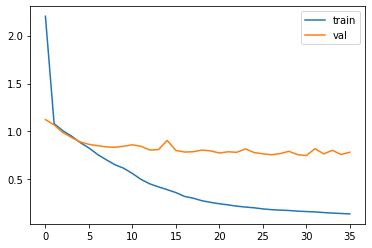

In [32]:
plt.plot(history['loss'], label = 'train')
plt.plot(history['val_loss'], label = 'val')
plt.legend()

In [33]:
res = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 19ms/step - loss: 0.6997 - accuracy: 0.7450


In [34]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 74.0 %


🥡 <b><u>Takeaways from building your own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenges. Take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

## (5) Using a pre-trained CNN = Transfer learning

As we said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks** : the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 min of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


### (5.1) Load VGG16 model

❓ **Question: loading the VGG16** ❓ 

* Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the documentation 📚  [tf/keras/applications/VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16)📚

* We will **load the VGG16 model** the following way:
    - 🤯 Let's use the **weights** learned on the [**imagenet dataset**](https://www.image-net.org/download.php) (14M pictures with 20k labels)
    - The **`input_shape`** corresponds to the common input shape of your images 
        - Note: *You have to resize them down to a common shape if they have different height/widths/channels*
    - The **`include_top`** argument should be set to `False`: 
        - to avoid loading the weights of the fully-connected layers of the VGG16
        - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

<i><u>Remark:</u></i> Do not change the default value of the other arguments

In [93]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():

    vgg = VGG16(include_top=False, input_shape = (256, 256, 3))

    vgg.trainable = False

    model = Sequential([
        vgg,
        Flatten(),
        Dense(500, activation = 'relu'),
        Dense(3, activation = 'softmax')   

    ])

    model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(0.00005),
                metrics = ['accuracy'])
    
    return model

❓ **Question: number of parameters in the VGG16** ❓ 

Look at the architecture of the model using ***.summary()***

In [94]:
model = load_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_17 (Flatten)        (None, 32768)             0         
                                                                 
 dense_30 (Dense)            (None, 500)               16384500  
                                                                 
 dense_31 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 31,100,691
Trainable params: 16,386,003
Non-trainable params: 14,714,688
_________________________________________________________________


<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D 
- The `layers.Flatten` and the `layers.Dense` are not here yet, we need to add them.
- There are more than 14.000.000 parameters, which is a lot... 
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers until the flattening will be set non-trainable.

---

# Preprocess the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓ 

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [95]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [96]:
X_train_preproc = preprocess_input(X_train)
X_val_preproc = preprocess_input(X_val)
X_test_preproc = preprocess_input(X_test)

### (5.3)  Fit the model



❓ **Question: Training the customized VGG16** ❓ 

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data are provided, therefore use `validation_data` instead of `validation_split`.

_As usual, store the results of your training into a `history` variable._

In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights = True)

model = load_model()

history = model.fit(X_train_preproc, y_train,
          epochs = 50,
          batch_size = 32,
          callbacks = [es],
          validation_data = (X_val_preproc, y_val)).history

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 2.9213 - accuracy: 0.7513

In [ ]:
plt.plot(history['loss'], label = 'train')
plt.plot(history['val_loss'], label = 'val')
plt.legend()

In [ ]:
res_vgg = model.evaluate(X_test_preproc, y_test)

In [ ]:
test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy_homemade = {round(test_accuracy,2)*100} %")

print(f'Chance level = {1./num_classes*100:.1f}%')



## (6) (Optional) Improve the model

You can here try to improve the model test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning) 
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **Data Augmentation** if your model is overfitting. 

2. If your model is not overfitting, try a more complex model.

3. Perform precise **Grid Search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

4. **Change the base model** to more modern one CNN (ResNet, EfficientNet1,... available in the keras library)

5. Curate the data: maintaining a sane data set is one of the keys to success.

6. Collect more data

---

🏁 **Congratulations** 🏁 

1. Download this notebook from your `Google Drive` or directly from `Google Colab` 
2. Drag-and-drop it from your `Downloads` folder to your local `[GITHUB_USERNAME]/data-challenges/06-Deep-Learning/03-Convolutional-Neural-Networks/04-transfer-learning`


💾 Don't forget to push your 

3. Follow the usual procedure on your terminal in the `06-Deep-Learning/03-Convolutional-Neural-Networks/004-transfer-learning` folder:
      * *git add cifar_classification.ipynb*
      * *git commit -m "I am the god of Transfer Learning"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.

🚀 If you have time, move on to the **Autoencoders** challenge!